In [2]:
import numpy as np
import numpy.random as npr
import numpy.linalg as npl
import scipy as sp
import scipy.integrate as spi
import scipy.linalg as spl
import scipy.stats as sps
import scipy.optimize as spo
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.linalg import logm
from scipy.special import erf
from scipy.integrate import quad

# Diffusion decision model with continuous output

In [3]:
def folded_normal_pdf(y, mu, sigma):
    """
    Probability density function for a folded normal distribution

    Parameters:
    - y (float or array-like): Value of the random variable
    - mu (float): Mean of the original normal distribution
    - sigma (float): Standard deviation of the original normal distribution

    Returns:
    - float or ndarray: Value of the probability density function

    """
    const = 1 / np.sqrt(2 * np.pi * sigma**2)

    exp1 = np.exp(-(y - mu)**2 / (2 * sigma**2))
    exp2 = np.exp(-(y + mu)**2 / (2 * sigma**2))

    pdf = const * (exp1 + exp2)

    return pdf

def normal_pdf(x, mu=0, sigma=1):
    """
    Calculate the probability density function (PDF) of a normal (Gaussian) distribution.

    Parameters:
    - x: The point at which to evaluate the PDF.
    - mu: The mean of the distribution.
    - sigma: The standard deviation of the distribution.

    Returns:
    - The probability density at the given point.
    """
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

def differential_entropy(pdf, lower_bound=-np.inf, upper_bound=np.inf, eps=1e-10):
    """
    Calculate the differential entropy of a continuous random variable given its PDF.

    Parameters:
    - pdf: A callable function that represents the probability density function f(x).
    - lower_bound: Lower bound of the integral (default: -infinity).
    - upper_bound: Upper bound of the integral (default: +infinity).
    - eps: A small value to avoid log(0) (default: 1e-10).

    Returns:
    - The differential entropy.
    """
    def integrand(x):
        fx = pdf(x)
        # Avoid log(0) by clipping fx to a small positive value
        return -fx * np.log(np.maximum(fx, eps))

    entropy, _ = quad(integrand, lower_bound, upper_bound)
    return entropy

def symmetry_entropy(mu, sigma):
    H = lambda pdf: differential_entropy(pdf)
    H_abs = lambda pdf: differential_entropy(pdf, lower_bound = 0, upper_bound=np.inf)
    return H(lambda x: normal_pdf(x, mu, sigma)) - H_abs(lambda x: folded_normal_pdf(x, mu, sigma))

def Sigma(f, t, A):
    return t * f**2 / A

def run_case(f, x0, A, t):
    Lambda = symmetry_entropy(x0 + f * t, np.sqrt(2 * A * t))
    S = Sigma(f, t, A)

    return S + Lambda, np.log(2), S, Lambda

# Calculation

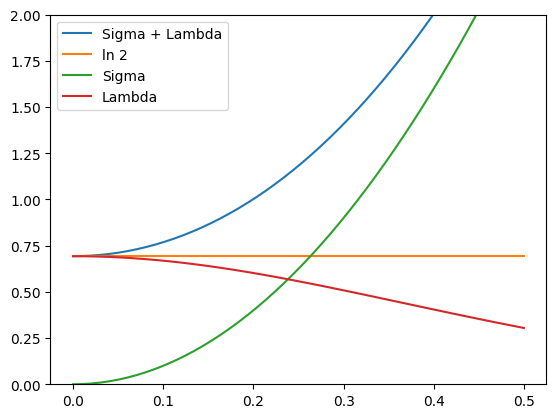

In [9]:
A = 1
tau = 10
x0 = 0

fs = np.linspace(0, 0.5)

rs = np.array([(f, *run_case(f, x0, A, tau)) for f in fs])
plt.plot(rs[:, 0], rs[:, 1], label = 'Sigma + Lambda')
plt.plot(rs[:, 0], rs[:, 2], label = 'ln 2')
plt.plot(rs[:, 0], rs[:, 3], label = 'Sigma')
plt.plot(rs[:, 0], rs[:, 4], label = 'Lambda')
plt.ylim(0, 2)
plt.legend()

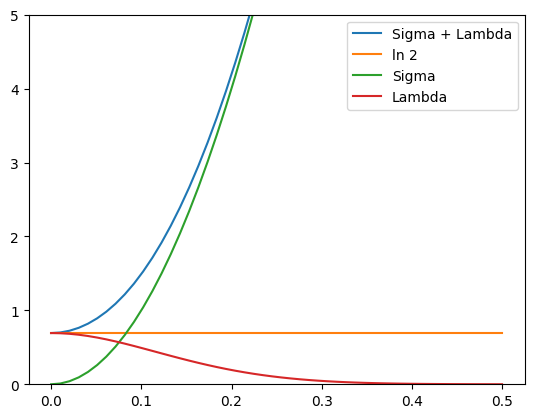

In [10]:
A = 0.1
tau = 10
x0 = 0

fs = np.linspace(0, 0.5)

rs = np.array([(f, *run_case(f, x0, A, tau)) for f in fs])
plt.plot(rs[:, 0], rs[:, 1], label = 'Sigma + Lambda')
plt.plot(rs[:, 0], rs[:, 2], label = 'ln 2')
plt.plot(rs[:, 0], rs[:, 3], label = 'Sigma')
plt.plot(rs[:, 0], rs[:, 4], label = 'Lambda')
plt.ylim(0, 5)
plt.legend()